## Predicting AstraZeneca Stock Prices
### Melania Czobit


In [ ]:
# !pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

Importing stock data

In [ ]:
# get AZN data from Yahoo finance 
data = yf.download('AZN','2013-01-01','2018-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-07,23.995001,24.100000,23.975000,24.055000,16.889841,1932200
2013-01-08,23.875000,24.110001,23.870001,24.075001,16.903885,1853800


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,32.138704,32.352449,31.942044,32.156093,26.522242,4.459468e+06
std,4.262358,4.291883,4.214947,4.250806,4.786121,3.549434e+06
min,22.370001,22.385000,22.230000,22.334999,16.336739,8.059000e+05
25%,29.040001,29.230000,28.879999,29.080000,23.975792,2.638200e+06
50%,33.169998,33.400002,32.959999,33.215000,26.862139,3.633800e+06
75%,35.200001,35.369999,34.939999,35.139999,29.255201,5.064400e+06
max,41.590000,41.779999,41.349998,41.490002,38.290752,5.746580e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2013-01-02 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1509 non-null   float64
 1   High       1509 non-null   float64
 2   Low        1509 non-null   float64
 3   Close      1509 non-null   float64
 4   Adj Close  1509 non-null   float64
 5   Volume     1509 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.5 KB


In [ ]:
data.isnull().values.any()

False

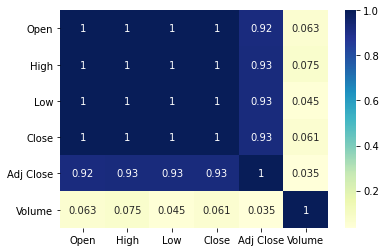

In [ ]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

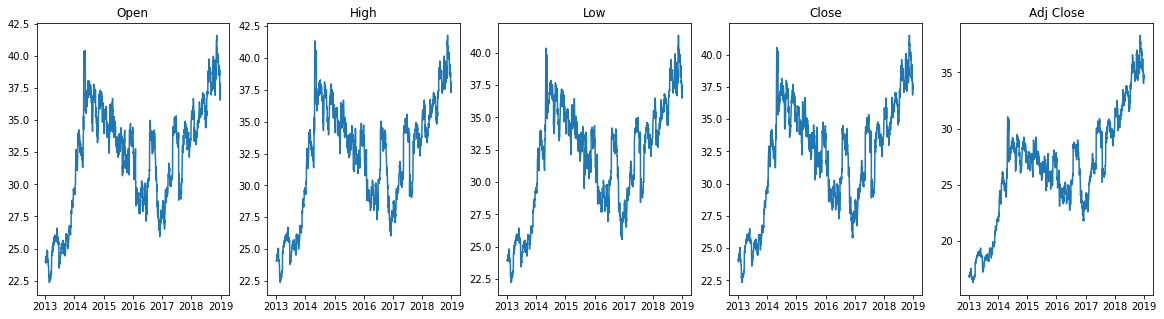

In [ ]:
figure, axis = plt.subplots(ncols=5, figsize = (20,5))
axis[0].plot(data["Open"])
axis[0].set_title("Open")

axis[1].plot(data["High"])
axis[1].set_title("High")

axis[2].plot(data["Low"])
axis[2].set_title("Low")

axis[3].plot(data["Close"])
axis[3].set_title("Close")

axis[4].plot(data["Adj Close"])
axis[4].set_title("Adj Close")

plt.show()

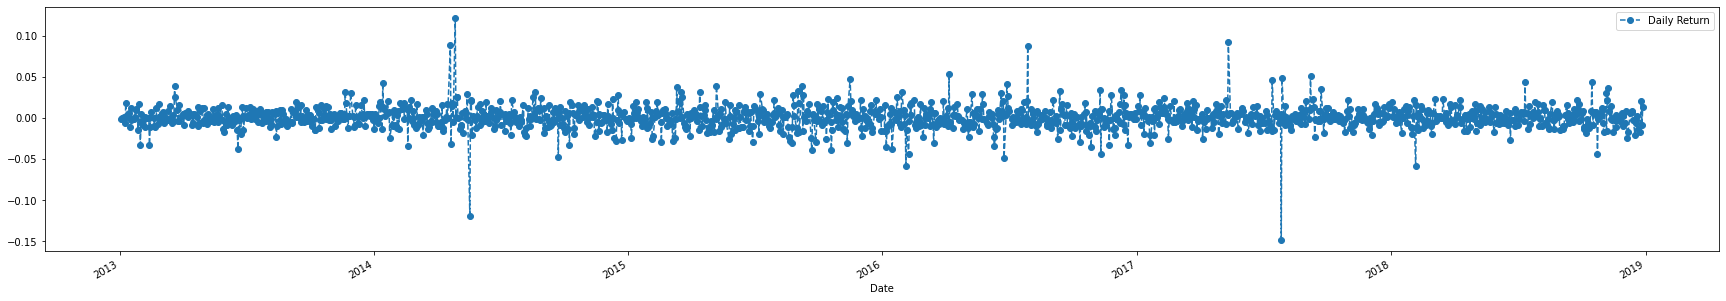

In [ ]:
# daily return 
data['Daily Return'] = data['Close'].pct_change()
data['Daily Return'].plot(figsize=(30,5),legend=True,linestyle='--',marker='o')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


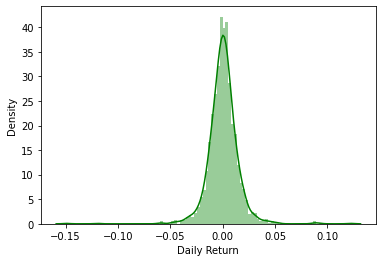

In [ ]:
sns.distplot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

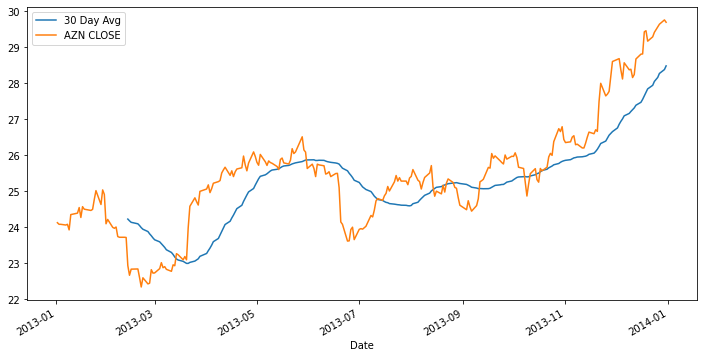

In [ ]:
# Rolling 30 day average against close price of AZN stock following restructuring 
plt.figure(figsize=(12,6))
data['Close'].loc['2013-01-01':'2014-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
data['Close'].loc['2013-01-01':'2014-01-01'].plot(label='AZN CLOSE')
plt.legend()

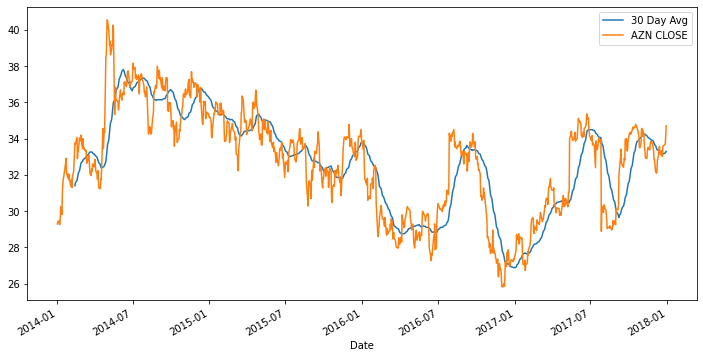

In [ ]:
plt.figure(figsize=(12,6))
data['Close'].loc['2014-01-01':'2018-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
data['Close'].loc['2014-01-01':'2018-01-01'].plot(label='AZN CLOSE')
plt.legend()

In [ ]:
data.reset_index(inplace=True)
data = data.rename(columns = {'index':'Date'})

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000,NaN
1,2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200,-0.001866
2,2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800,0.000000
3,2013-01-07,23.995001,24.100000,23.975000,24.055000,16.889841,1932200,-0.000831
4,2013-01-08,23.875000,24.110001,23.870001,24.075001,16.903885,1853800,0.000831


Long Short Term Memory (LSTM)
